# LangGrap

Um complemento ao LangChain com o uso de grafos. Trazendo maior controle e robustez em workflows complexos.

## Setup

In [16]:
from typing import TypedDict

from IPython.display import display, Image
from langgraph.graph import END, StateGraph, START

## Estado

In [2]:
class State(TypedDict):
    message: str

## Callback

In [3]:
def start_node(state: State):
    print('Início do processo')
    return {'message': 'Vamos começar!'}


def process_node(state: State):
    print('Processando', state['message'])
    return {'message': state['message'] + ' Agora estamos processando'}


def end_node(state: State):
    print('Finalizando:', state['message'])
    return state

## Grafo

In [13]:
builder = StateGraph(State)
builder.add_node('start_node', start_node)
builder.add_node('process_node', process_node)
builder.add_node('end_node', end_node)

### Edges

In [14]:
builder.add_edge(START, 'start_node')
builder.add_edge('start_node', 'process_node')
builder.add_edge('process_node', 'end_node')
builder.add_edge('end_node', END)

## Compile

In [15]:
graph = builder.compile()

## View

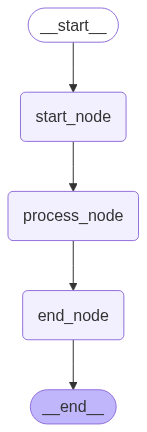

In [17]:
display(Image(graph.get_graph().draw_mermaid_png()))

## Invoke

In [18]:
graph.invoke({})

Início do processo
Processando Vamos começar!
Finalizando: Vamos começar! Agora estamos processando


{'message': 'Vamos começar! Agora estamos processando'}